# Проект урока 8. Работа с грязными данными

Для выполнения этого проекта скачайте Jupyter-ноутбук с описанием заданий отсюда. Загрузите его в JupyterHub. Откройте ноутбук и выполняйте задания в нём. Код вы будете писать в ноутбуке, а сдавать решения на проверку — в LMS.

## Часть 1. Объединение данных о покупках из папок

## Шаг 1

**Описание**

На этот раз данные имеют следующую структуру:

* данные записываются для каждого пользователя, совершившего покупки, каждый день
* для каждой даты есть своя папка, внутри неё — папки для каждого пользователя
* внутри каждой папки пользователя есть файл `data.csv`, где и хранятся данные

Схематично это выглядит так:

```
└── data
   ├── 2020-12-30
   │  ├── FirstName_LastName1
   │  │   └── data.csv
   │  ├── FirstName_LastName2
   │  │   └── data.csv
   │  └── FirstName_LastName3
   │      └── data.csv
   └── 2020-12-31
      ├── FirstName_LastName1
      │   └── data.csv
      └── FirstName_LastName5
          └── data.csv
```

Например, 30 декабря 2020 года три покупателя сделали покупки, 31 — два (папки 2020-12-30 и 2020-12-31 соответственно). 

Поскольку клиент `FirstName_LastName1` купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов — по одной.

**Примечание**: данные в задании покрывают другой временной период, имена тоже другие. Подробности, примеры и возможные подсказки можно найти в текстах следующих шагов.

**Задачи**
1. Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), а также имя пользователя (`name`), и дата этих покупок (`date`), соответствующие названию папок, где лежит файл.
2. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
3. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с `product_id==56`?
4. Визуализируйте продажи по дням.
5. Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым `product_id`, совершенную в разные дни. 

Найти данные можно либо на JupyterHub, либо скачать архив [отсюда](https://yadi.sk/d/fkzS9UYSr59EQQ).


Вы можете решать задания тем способом, который считаете наиболее удобным или оптимальным. А для того, чтобы лучше понять задание, следуйте по шагам выполнения. Бывает, что их можно выполнить в одну строчку, применяя методы друг за другом. А если выполняете шаги отдельно, не забудьте сохранить результат в переменную, чтобы в следующем шаге работать именно с ней.

В ноутбуке место для вашего решения обозначено комментарием `# Ваш код здесь`, но вы можете писать код там, где вам удобно, добавлять или удалять ячейки с кодом или текстом по вашему усмотрению.

Кроме того можно посмотреть подсказки, кликнув на строчку `► Нажмите сюда, чтобы увидеть подсказку`. Также не забывайте о наличии конспектов и возможности задать вопрос в `Discord`, ссылка на нужный тред есть на странице каждого шага в LMS.

### Шаг 2

Соберите все данные из папки `data` в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), а также имя пользователя (`name`), дата этих покупок (`date`), соответствующие названию папок, где лежит файл.

Пример итоговой таблицы:

|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|56|2|Anatoly_Karpov|2020-12-30|
|1|7|2|Anatoly_Karpov|2020-12-30|
|2|9|3|Anatoly_Karpov|2020-12-30|

Для объединения датафреймов, читаемых из файлов, можно использовать метод `pd.concat()`. Например:

1. Имеются следующие данные:

```python
> df_1
```

|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|56|2|Anatoly_Karpov|2020-12-30|
|1|7|2|Anatoly_Karpov|2020-12-30|
|2|9|3|Anatoly_Karpov|2020-12-30|

```python
> df_2
```

|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|4|2|Кatya_Skriptsova|2020-12-30|
|1|71|1|Кatya_Skriptsova|2020-12-31|

2. Соединяем, передав `pd.concat` на вход список датафреймов, которые нужно объединить. Обратите внимание: индексы повторяются, поэтому после соединения всех данных нужно их сбросить.

```python
> df = pd.concat([df_1, df_2])
> df
```
|#|product_id|quantity|name|date|                                                                                     
|:-|:----|:-----|:--|:-----|                                              
|0|56|2|Anatoly_Karpov|2020-12-30|
|1|7|2|Anatoly_Karpov|2020-12-30|
|2|9|3|Anatoly_Karpov|2020-12-30|
|0|4|2|Кatya_Skriptsova|2020-12-30|
|1|71|1|Кatya_Skriptsova|2020-12-31|



**Рекомендуем решать данное задание через `os.walk()`.**

**В качестве ответа укажите сумму по колонке `quantity`.**

**Шаги выполнения:**

1. Для начала составим путь `way` до папки `data`.

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Сначала необходимо прописать путь к папке `data`, предварительно сохранив этот путь в переменную (к примеру, `way`).
      
А как построить путь до папки `data`?
      
* Вы можете использовать абсолютный путь к файлу, пропишите `~/`, нажмите `tab` и стройте путь до желаемого файла/папки:
      
```python
'...shared/homeworks/python_ds_miniprojects/7/data'
```
      
Например, путь до папки `data` у пользователя `аn-кarpov`, будет выглядеть следующим образом:
      
```python
'/mnt/HC_Volume_18315164/home-jupyter/jupyter-аn-кarpov/shared/homeworks/python_ds_miniprojects/7/data/'
```
Чтобы построить свой путь, вместо `аn-кarpov` необходимо указать ваш логин, используемый в LMS. 
      
</p>
</details>

In [1]:
# Ваш код здесь
way = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/'


2. Пройдемся по результату построения пути до папки `data` методом `os.walk(way)` простым циклом и распечатаем каждый элемент, посмотрим, что получилось.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Метод `os.walk` принимает путь к папке, проходится по всем подпапкам в ней и доходит до конечных файлов в них, выдавая на каждой итерации:
* путь к папке, которую мы сейчас смотрим: `path`
* список подпапок в ней: `dirs`
* список файлов в ней: `files`
      

```python
for path, dirs, files in os.walk(way):
    print(path, dirs, files)  
```
      
Результатом выполнения такого цикла будет генератор, который генерирует кортежи для каждой директории в дереве каталогов. Каждый кортеж содержит три элемента: путь к папке, список подпапок в текущей папке и список имен файлов в них, не являющихся папками.
      
</p>
</details>

In [5]:
# Ваш код здесь
for path, dirs, files in os.walk(way):
    print(path, dirs, files)


/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/ ['2020-12-05', '2020-12-08', '2020-12-09', '2020-12-04', '2020-12-06', '2020-12-03', '2020-12-07'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05 ['Petr_Ivanov', 'Petr_Smirnov', 'Rostislav_Smirnov', 'Kirill_Smirnov', 'Alexey_Fedorov', 'Alexey_Petrov'] []
/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Ivanov [] ['data.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Smirnov [] ['data.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Rostislav_Smirnov [] ['data.csv']
/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324

3. Далее попробуем с помощью циклов и `os.path.join(path, file)` построить пути до каждого файла в подпапке `2020-12-05` и распечатать их.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Теперь в цикл `for` в метод `os.walk()` передайте путь к подпапке `2020-12-05`: 

`'...shared/homeworks/python_ds_miniprojects/7/data/2020-12-05'`
      
Далее используйте вложенный цикл `for` для обхода всех файлов (`files`) в текущем пути.
      
И после с помощью метода `os.path.join(path, file)` постройте полный путь к текущему файлу, объединяя текущий путь `path` и имя файла `file`:
      
```python
      
for path, dirs, files in os.walk(f'/mnt/HC_Volume_18315164/home-jupyter/jupyter-{student_login}/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05'):
    for file in files:
        file_path = os.path.join(path, file)
        print(file_path)
```
   
</p>
</details>

In [8]:
# Ваш код здесь
file_paths = []
folder = '2020-12-05'
folder_path = os.path.join(way, folder)
for f in os.listdir(folder_path):
    person_folder = os.path.join(folder_path, f)
    for file in os.listdir(person_folder):
        file_path = os.path.join(person_folder, file)
        file_paths.append(file_path)
file_paths

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Ivanov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Alexey_Petrov/data.csv']

4. Теперь можно использовать полученные знания, чтобы с помощью метода `os.walk()` построить пути до всех файлов с расширение `.csv`, находящихся в подпапках, в папке `data`, и сохранить эти данные в список. 

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Создайте пустой список, например, `file_paths`, куда будете добавлять получившиеся пути к файлам.
      
Теперь используйте метод `os.walk`, который принимает путь к папке и проходится по всем подпапкам в ней, выдавая на каждой итерации:
* путь к папке, которую мы сейчас смотрим: `path`
* список подпапок в ней: `dirs`
* список файлов в ней: `files`
      
Далее используйте вложенный цикл `for` для обхода всех файлов (`files`) в текущем пути.
      
С помощью условного оператора `if` проверьте имеют ли файлы в подпапках расширение '.csv'. 
      
Если да, то с помощью метода `os.path.join(path, file)` постройте полный путь к текущему файлу, объединяя текущий путь `path` и имя файла `file`.
      
Не забудьте добавлять получившиеся пути в созданный ранее список.
      
      
```python
# Создаём пустой список file_paths, в который будут добавляться пути к файлам.
file_paths = []
# Запускаем цикл for cовместно с методом os.walk() по папке data
# В переменной path находится текущий путь (папка data), dirs — список подпапок в текущей папке, files — список файлов в них
for path, dirs, files in os.walk(way):
	# Вложенный цикл для перебора файлов в текущей папке
    for file in files:
		# Проверка формата файла — файл должен заканчиваться на '.csv'
        if file.endswith('.csv'):
		    # Построение полного пути к файлу с помощью os.path.join(), объединяя текущий путь path и имя файла file
            file_path = os.path.join(path, file)
            # Добавляем получившийся путь в список
            file_paths.append(file_path)      
```
      
</p>
</details>

In [9]:
# Ваш код здесь
file_paths = []
for path, dirs, files in os.walk(way):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(path, file)
            file_paths.append(file_path)
file_paths

['/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Ivanov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Rostislav_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Kirill_Smirnov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Alexey_Fedorov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Alexey_Petrov/data.csv',
 '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0

**Пути к файлам мы получили, что дальше?**

5. Теперь необходимо считать данные файлы, собрав их в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (`product_id`, `quantity`), а также: имя пользователя(`name`) и дату этих покупок (`date`), которые можно получить из соответствующих названий папок, где лежат файлы.

   Как мы помним, пути к каждому файлу уже построены, а значит можно прочитать все файлы. 

   Поскольку название путей — это строки, то мы можем, использовав строковые методы, достать из путей нужную нам часть, а именно: информацию об имени пользователя и о дате покупки.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

А с чего тут начать?
      
Создаем пустую таблицу данных, например, `df`, которую мы будем заполнять данными:
      
```python
df = pd.DataFrame() 
```

Запускаем цикл для каждого пути к файлу `i` из списка путей — `file_paths`, и для каждого `i` выполняем следующие действия:
      
* Считываем данные с помощью `pd.read_csv(i)` и сохраняем их в переменную, возьмем, например, `data`, таким образом, у нас в переменной `data` на каждой итерации будут оказываться мини-таблицы соответствующие каждому пути
* Добавляем новые столбцы и значения в таблицы:

```python
data['name'] = значения
data['date'] = значения ```
      
Как уже упоминалось, каждый путь представляет собой строку (расположение данных в путях одинаковое), элементы которой разделены `/`, поэтому мы можем использовать строковый метод `split()` с разделителем `/`, разделить по нему путь к файлу и с помощью индексов достать нужные части.
      
Например:
      
```python
str_way = 'shared/homeworks/python_ds_miniprojects/7/data/2020-12-05/Petr_Ivanov/data.csv'
name = str_way.split('/')[-2]
      
#Вывод
'Petr_Ivanov'

```
Объедините с помощью метода `pd.concat()` созданный перед циклом пустой датафрейм `df` и считанный в цикле `data`.

Таким образом каждый мини-датафрейм будет считываться на каждой итерации, в него будут добавляться колонки с датой и именем, а далее он будет добавлен в общий датафрейм.
      
</p>
</details>

In [25]:
# Ваш код здесь
df = pd.DataFrame()
for i in file_paths:
    data = pd.read_csv(i)
    data['name'] = i.split('/')[-2]
    data['date'] = i.split('/')[-3]
    df = pd.concat([df, data])
df.head()

,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05


6. Осталось сбросить индексы и посчитать сумму по колонке `quantity`!

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Чтобы сбросить индекс датафрэйма на стандартные числа от 0 до числа строк -1, используйте метод `reset_index`. 
А для того, чтобы старый индекс не стал колонкой, а просто ушёл, укажите параметр `drop=True`. 

Например,

```python
df.reset_index(drop=True)
```
вернёт датафрэйм, где вместо оригинального индекса будет стандартный.

Для вычисления суммы значений `quantity` используйте метод `sum()` к этой колонке. 

</p>
</details>

In [26]:
# Ваш код здесь
df = df.reset_index(drop=True) # чтобы старый индекс не стал колонкой, а просто ушёл, укажите параметр drop=True
print(df.head())
df.quantity.sum()

   Unnamed: 0  product_id  quantity         name        date
0           0          27         4  Petr_Ivanov  2020-12-05
1           1          89         1  Petr_Ivanov  2020-12-05
2           2          33         2  Petr_Ivanov  2020-12-05
3           3           8         3  Petr_Ivanov  2020-12-05
4           4          16         1  Petr_Ivanov  2020-12-05


480

### Шаг 3

Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке. Например:

```python
Anatoly_Karpov, Nekto_Ktotovich, Lena_Uhanova, Ignat, Sasha_Tokarev
```

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

А как быть тут?
    
Сгруппируйте данные по пользователям (`name`) и посчитайте для каждого пользователя сумму по числу заказов (`quantity`). Потом отберите только имена тех, у кого максимальное число покупок.
      
</p>
</details>

In [29]:
# Ваш код здесь

df.head()


,Unnamed: 0,product_id,quantity,name,date
0,0,27,4,Petr_Ivanov,2020-12-05
1,1,89,1,Petr_Ivanov,2020-12-05
2,2,33,2,Petr_Ivanov,2020-12-05
3,3,8,3,Petr_Ivanov,2020-12-05
4,4,16,1,Petr_Ivanov,2020-12-05


In [30]:
df = df.drop(columns=['Unnamed: 0'])
df

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,2020-12-05
1,89,1,Petr_Ivanov,2020-12-05
2,33,2,Petr_Ivanov,2020-12-05
3,8,3,Petr_Ivanov,2020-12-05
4,16,1,Petr_Ivanov,2020-12-05
...,...,...,...,...
156,18,4,Petr_Fedorov,2020-12-07
157,94,4,Petr_Fedorov,2020-12-07
158,95,2,Vasiliy_Ivanov,2020-12-07
159,83,3,Vasiliy_Ivanov,2020-12-07


In [33]:
df_by_users = df.groupby('name', as_index=False)\
    .agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending=False)
df_by_users

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [37]:
df_by_users.head(2).name.values

array(['Alexey_Smirnov', 'Petr_Smirnov'], dtype=object)

### Шаг 4

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, `sns.barplot`), где:

* по оси x — идентификаторы товаров (`product_id`) 
* по оси y — суммарное число их покупок (сколько товаров с таким `product_id` было продано)

Для практики попробуйте изменить параметры графика, например: цвет (`color`), сортировку значений по оси х (`order`). 

В качестве ответа укажите, сколько было продано единиц товара с `product_id` равным `56`.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Как делать это задание?

Сгруппируйте данные по товарам (`product_id`) и посчитайте для каждого товара сумму по числу заказов (`quantity`). Для визуализации используйте `sns.barplot`.
      
Для построения нужного графика импортируйте `seaborn` и `matplotlib.pyplot`, вызовите `sns.barplot`, указав там нужные `x` и `y`. 
      
Например,

```python
sns.barplot(x=df.col_x, y=df.col_y)
```
построит график с соответствующими координатами `x` и `y` из колонок `col_x` и `col_y` для столбиков.

Альтернативно можно указать в `x` и `y` только названия нужных колонок в кавычках, а также передать в `data` переменную с датафрэймом:

```python
sns.barplot(x='col_x', y='col_y', data=df)
```  
Чтобы указать параметры графика: цвет (`color`), сортировку значений по оси `х` (`order`), введите их в функцию `sns.barplot`.
      
Сортировку значений можно задать следующим образом:
      
```python
sns.barplot(x='col_x', y='col_y', data=df, order=df.sort_values('col_y').col_x, ax=ax)
```
      
Подробнее можно посмотреть в [документации](https://seaborn.pydata.org/generated/seaborn.barplot.html).
      
</p>
</details>

In [51]:
# Ваш код здесь
df_by_product_id = df.groupby('product_id', as_index=False)\
    .agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending=False)\
    .head(10)
df_by_product_id


,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


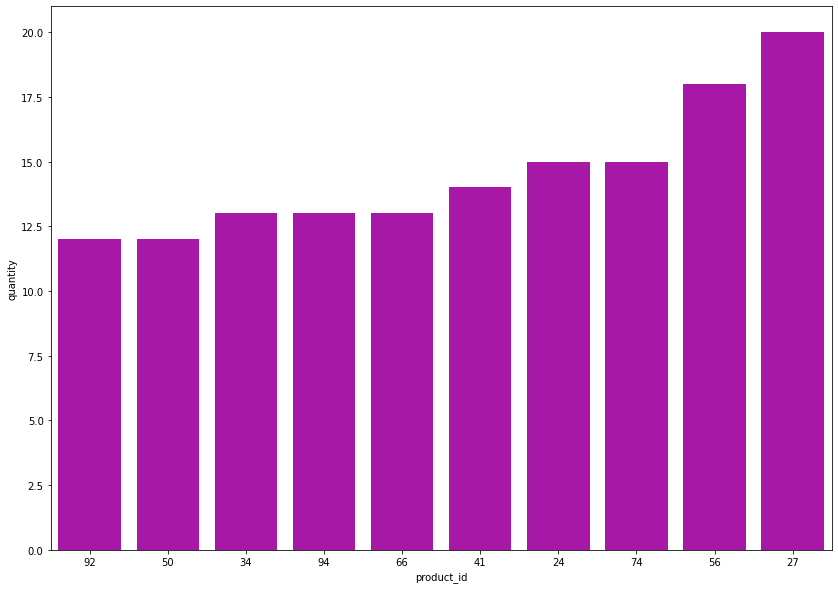

In [56]:
plt.figure(figsize=(14,10))
sns.barplot(x=df_by_product_id.product_id, y=df_by_product_id.quantity, order=df_by_product_id.sort_values('quantity').product_id, color='m')

### Шаг 5

Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси `x` будут дни, по которым у нас есть данные (`date`). 

Далее выберите верные утверждения:

* Меньше всего товаров было приобретено 6 декабря
* 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день
* 8 и 9 декабря было продано примерно одинаковое число товаров
* Максимальное число товаров было продано 4 декабря
* Меньше всего продуктов было приобретено 4 декабря
* 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Сгруппируйте данные по датам (`date`) и посчитайте для каждого дня сумму по числу заказов (`quantity`). Для визуализации используйте `sns.barplot`.
      
С помощью графика ответьте на вопросы по заданию.
      
</p>
</details>

In [58]:
# Ваш код здесь
df.head()
df_by_date = df.groupby('date', as_index=False)\
    .agg({'quantity': 'sum'})
df_by_date


,date,quantity
0,2020-12-03,60
1,2020-12-04,113
2,2020-12-05,61
3,2020-12-06,15
4,2020-12-07,94
5,2020-12-08,68
6,2020-12-09,69


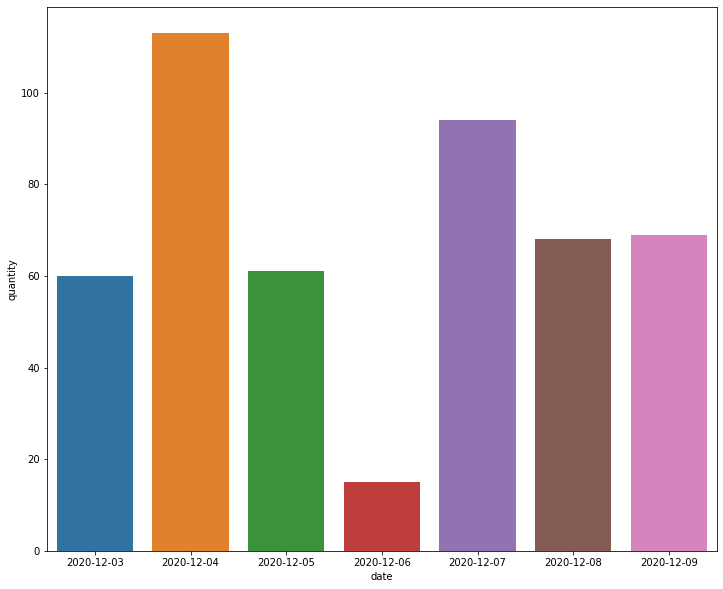

In [65]:
plt.figure(figsize=(12,10))
sns.barplot(x=df_by_date.date, y=df_by_date.quantity) 

### Шаг 6

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Один из вариантов решения — удалить дубликаты по имени, продукту и дате. Это оставит только по одной строке на каждую покупку продукта в день. Затем нужно сгруппировать по колонкам `name` и `product_id` и посчитать число дней покупок каждого продукта для каждого человека (то есть число строк в группе). 
      
После этого отобрать строки со значением больше `1`, то есть только строки пользователей, купивших что-то в разные дни.

Для удаления повторяющихся строк используется метод `drop_duplicates()`. Под повторяющимися имеется в виду, что значения в этих строках во всех их колонках одинаковые:
    
```python
df.drop_duplicates()
```
Такой код вернёт датафрэйм, где не будет повторяющихся строк, но чтобы смотреть на повторность не по всем столбцам, а только по части, необходимо воспользоваться параметром `subset`.
    
```python
df.drop_duplicates(subset='my_unique_column')
```
Так мы получим датафрэйм, где не будет строк с одинаковым значением в колонке `my_unique_column`      
      
</p>
</details>

In [93]:
# Решение, предлагаемое в подсказке
df.drop_duplicates(subset=['name', 'date', 'product_id'])\ # Для удаления повторяющихся строк используется метод drop_duplicates(). 
    .groupby(['name', 'product_id'], as_index=False)\ # Под повторяющимися имеется в виду, что значения в этих строках во всех их колонках одинаковые
    .agg({'date': 'count'})\
    .query('date > 1')

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2


In [94]:
# Мое решение
# Вопрос "Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)?"
# Переформулировав на язык python: 
# "Для каждого товара, для каждого пользователя, купившего этот товар, найти кол-во раз, которое он его купил, 
# причем за '1 раз' считается новая дата покупки - то есть уникальные даты показывают кол-во раз". 
# Отобрать те строки, где кол-во раз > 1

In [88]:
# Ваш код здесь
df.head()
df_by_more_than_one_purchase = df.groupby(['product_id', 'name'], as_index=False)\
    .agg({'date': 'nunique'})
df_by_more_than_one_purchase

,product_id,name,date
0,0,Vasiliy_Ivanov,1
1,1,Alexey_Smirnov,1
2,3,Kirill_Fedorov,1
3,3,Petr_Smirnov,1
4,4,Alexey_Smirnov,1
...,...,...,...
153,95,Vasiliy_Ivanov,1
154,96,Petr_Smirnov,1
155,97,Vasiliy_Fedorov,1
156,99,Alexey_Fedorov,1


In [89]:
df_by_more_than_one_purchase.query('date > 1')

,product_id,name,date
24,15,Anton_Ivanov,2
150,94,Petr_Fedorov,2


## Часть 2. Обработка данных телемаркетинга

В данном проекте путём объединения файлов о продажах с логами по подключениям в системе, вы сможете проверить корректность подключений определенных пользователей. 

В папке `subsid` (`'...shared/homeworks/python_ds_miniprojects/7_subsid/subsid'`) находятся файлы (`tm_sales_1.csv`, `tm_sales_2.csv`, `tm_sales_3.csv`) с продажами продуктов через телемаркетинг, каждый из которых содержит колонки (поля): `FILIAL_ID`, `SUBS_ID`, `PROD_ID`, `ACT_DTTM`. 

А также файл `prod_activations_logs.csv` с данными о подключениях в системе, который содержит колонки: `SUBS_ID`, `PROD_ID`, `START_DTTM`, `END_DTTM`.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, соединив файлы о продажах с логами по подключениям в системе.

Особенности данных:

* если в файле с продажами встречается строка без указанного `SUBS_ID`, она пропускается
* сотрудники телемаркетинга не всегда указывают полный `id`, если `'id'` нет в начале `SUBS_ID`, то нужно его добавить
* поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
* колонки с датами необходимо перевести в формат `datetime`(временной тип)
* продажа не засчитывается, если отключение (`END_DTTM`) произошло меньше чем через 5 минут после подключения (`START_DTTM`)


Сохраните результат в `csv` файл с разделителем `;`, содержащий корректные подключения.

**Примечание:** обратите внимание на то, как `pandas` переводит дату из строки, возможно вам понадобится параметр `format`.



### Шаг 7

Для проверки результатов введите `SUBS_ID` из полученного датасета в порядке возрастания, через запятую с пробелом. 

Например:

```python
id1, id2
```

**Шаги выполнения:**

1. Сначала прочитайте `csv` файлы удобным для вас способом.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Вы можете использовать абсолютные пути и считать файлы из папки `'~/...shared/homeworks/python_ds_miniprojects/7_subsid/subsid'`
      
Либо скачать файлы из папки `shared`, поместить их в свой Jupyter-ноутбук в папку, где расположен данный ноутбук и считать оттуда.
      
</p>
</details>

In [69]:
# Ваш код здесь
way2 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7_subsid/subsid/'
tm_sales_1 = pd.read_csv(way2 + 'tm_sales_1.csv', sep=';', parse_dates=['ACT_DTTM'])
tm_sales_2 = pd.read_csv(way2 + 'tm_sales_2.csv', sep=';', parse_dates=['ACT_DTTM'])
tm_sales_3 = pd.read_csv(way2 + 'tm_sales_3.csv', sep=';', parse_dates=['ACT_DTTM'])
prod_activations_logs = pd.read_csv(way2 + 'prod_activations_logs.csv', sep=';')

In [70]:
print(tm_sales_1.shape)
print(tm_sales_1.dtypes)
tm_sales_1.head()

(3, 4)
SUBS_ID              object
FILIAL_ID             int64
PROD_ID               int64
ACT_DTTM     datetime64[ns]
dtype: object


,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00
1,7646509,5,6431,2020-03-19 13:00:00
2,id7412683,4,3313,2020-03-22 17:25:00


In [71]:
tm_sales_1['ACT_DTTM'] = pd.to_datetime(tm_sales_1['ACT_DTTM'], format='%d-%m-%Y %H:%M')
tm_sales_1
# Обратите внимание! format задаёт только то, как считываются данные. 
# Отображаться в самом датафрейме дата всегда будет в формате год-месяц-день. 
# Поэтому не пугайтесь того, что вы написали ему день-месяц-год, а пишет он в другом порядке — это нормально.

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00
1,7646509,5,6431,2020-03-19 13:00:00
2,id7412683,4,3313,2020-03-22 17:25:00


In [72]:
print(tm_sales_2.shape)
print(tm_sales_2.dtypes)
tm_sales_2.head()

(4, 4)
FILIAL_ID             int64
SUBS_ID              object
PROD_ID               int64
ACT_DTTM     datetime64[ns]
dtype: object


,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,2020-03-17 10:17:00
1,4,NaN,7421,2020-12-03 11:25:00
2,7,8362218,9879,2020-05-03 11:42:00
3,2,2185490,3210,2020-03-16 16:28:00


In [73]:
tm_sales_2['ACT_DTTM'] = pd.to_datetime(tm_sales_2['ACT_DTTM'], format='%d-%m-%Y %H:%M')
tm_sales_2

,FILIAL_ID,SUBS_ID,PROD_ID,ACT_DTTM
0,3,id5416547,1743,2020-03-17 10:17:00
1,4,NaN,7421,2020-12-03 11:25:00
2,7,8362218,9879,2020-05-03 11:42:00
3,2,2185490,3210,2020-03-16 16:28:00


In [74]:
print(tm_sales_3.shape)
print(tm_sales_3.dtypes)
tm_sales_3.head()

(3, 4)
FILIAL_ID             int64
PROD_ID               int64
SUBS_ID              object
ACT_DTTM     datetime64[ns]
dtype: object


,FILIAL_ID,PROD_ID,SUBS_ID,ACT_DTTM
0,3,1499,id5764122,2020-03-18 15:44:00
1,6,3020,id7642700,2020-03-15 14:21:00
2,2,5677,id1374509,2020-03-17 11:48:00


In [75]:
tm_sales_3['ACT_DTTM'] = pd.to_datetime(tm_sales_3['ACT_DTTM'], format='%d-%m-%Y %H:%M')
tm_sales_3

,FILIAL_ID,PROD_ID,SUBS_ID,ACT_DTTM
0,3,1499,id5764122,2020-03-18 15:44:00
1,6,3020,id7642700,2020-03-15 14:21:00
2,2,5677,id1374509,2020-03-17 11:48:00


In [76]:
print(prod_activations_logs.shape)
print(prod_activations_logs.dtypes)
prod_activations_logs.head()

(9, 4)
SUBS_ID       object
PROD_ID        int64
START_DTTM    object
END_DTTM      object
dtype: object


,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,20-03-2020 14:59,01-12-2020 00:00
5,id7646509,6431,19-03-2020 13:00,19-03-2020 13:03
2,id7461794,3310,20-03-2020 17:25,01-12-2020 00:00
3,id5416547,1743,17-03-2020 10:17,25-03-2020 11:00
4,id8238421,1859,01-03-2020 11:42,01-03-2020 11:43


In [77]:
prod_activations_logs['START_DTTM']= pd.to_datetime(prod_activations_logs['START_DTTM'], format='%d-%m-%Y %H:%M')
prod_activations_logs['END_DTTM']= pd.to_datetime(prod_activations_logs['END_DTTM'], format='%d-%m-%Y %H:%M')
print(prod_activations_logs.dtypes)
prod_activations_logs

SUBS_ID               object
PROD_ID                int64
START_DTTM    datetime64[ns]
END_DTTM      datetime64[ns]
dtype: object


,SUBS_ID,PROD_ID,START_DTTM,END_DTTM
1,id4651830,1954,2020-03-20 14:59:00,2020-12-01 00:00:00
5,id7646509,6431,2020-03-19 13:00:00,2020-03-19 13:03:00
2,id7461794,3310,2020-03-20 17:25:00,2020-12-01 00:00:00
3,id5416547,1743,2020-03-17 10:17:00,2020-03-25 11:00:00
4,id8238421,1859,2020-03-01 11:42:00,2020-03-01 11:43:00
3,id8641743,2752,2020-03-20 15:44:00,2020-04-21 15:44:00
2,id2185490,3210,2020-03-16 16:28:00,2020-12-01 00:00:00
6,id7642700,3020,2020-03-15 14:21:00,2020-03-15 23:42:00
2,id8741631,5677,2020-03-19 12:28:00,2020-12-01 00:00:00


2. Теперь объединим датафреймы с продажами продуктов через телемаркетинг `tm_sales_1`, `tm_sales_2`, `tm_sales_3` в единую таблицу, а также избавимся от строк, где пропущено значение по колонке `SUBS_ID`.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Объединить таблицы можно с помощью метода `pd.concat()`:
      
```python
full_df = pd.concat([df1, df2])
```
Для того чтобы избавиться от пропущенных значений в строках по какому-то из столбцов(колонок), используйте метод `dropna()` с параметром `subset`, в который можно передать в виде списка набор колонок, где необходимо избавиться от наличия пропущенных значений.
    
Например, следующий код  вернёт датафрэйм без строк, где в колонке `col1` были пропущенные значения:
    
```python
df.dropna(subset=['col1'])
```
        
      
</p>
</details>

In [118]:
# Ваш код здесь
df = pd.concat([tm_sales_1, tm_sales_2])
df = pd.concat([df, tm_sales_3])
df = df[df['SUBS_ID'].notna()]
df = df.reset_index()
df = df.drop(columns='index')
df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00
1,7646509,5,6431,2020-03-19 13:00:00
2,id7412683,4,3313,2020-03-22 17:25:00
3,id5416547,3,1743,2020-03-17 10:17:00
4,8362218,7,9879,2020-05-03 11:42:00
5,2185490,2,3210,2020-03-16 16:28:00
6,id5764122,3,1499,2020-03-18 15:44:00
7,id7642700,6,3020,2020-03-15 14:21:00
8,id1374509,2,5677,2020-03-17 11:48:00


3. В задании указано, что сотрудники телемаркетинга не всегда указывают полный `id`, поэтому далее нам необходимо в случае отсутствия  `'id'` в начале значений по колонке `SUBS_ID` добавить его. 

   Это можно сделать разными способами, в подсказках будет предложен один из вариантов. 

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Вы можете сделать обычную функцию(`def`), работающую на одном значении `x` и прибавляющую к нему `id` при необходимости, передав её в `apply`, либо сделать сразу `лямбда-функцию` внутри метода `apply`.
      
Обратите внимание, что применять функцию необходимо ни ко всему датафрейму, а к колонке, значения в которой необходимо преобразовать:
      
```python
df['сol_1'] = tm_sales['сol_1'].apply(function)          
```
      
А как добавить `'id'` в начало `SUBS_ID`?
    
Здесь на помощь может прийти конкатенация строк (`'id' + необходимое_значение`). 
      
Можно реализовать функцию, которая будет принимать значение `x`, проверять на наличие `'id'` в начале строки и взависимости от этого либо добавлять `'id'` в начало строки, либо нет.
   
Проверить наличие какого-то значения в начале строки `x` поможет метод `x.startswith('id')`
      
</p>
</details>

In [119]:
# Ваш код здесь
df['SUBS_ID'] = df['SUBS_ID'].apply(lambda x: 'id' + x if x.startswith('id')==False else x)
df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00
1,id7646509,5,6431,2020-03-19 13:00:00
2,id7412683,4,3313,2020-03-22 17:25:00
3,id5416547,3,1743,2020-03-17 10:17:00
4,id8362218,7,9879,2020-05-03 11:42:00
5,id2185490,2,3210,2020-03-16 16:28:00
6,id5764122,3,1499,2020-03-18 15:44:00
7,id7642700,6,3020,2020-03-15 14:21:00
8,id1374509,2,5677,2020-03-17 11:48:00


4. Далее объедините таблицы с продажами с данными о подключениях в системе (таблица `prod_activations_logs.csv`) по колонкам `SUBS_ID` и `PROD_ID`.

    Также переведите колонки с датами к необходимому типу данных. Обратите внимание на формат считываемых данных в колонках, содержащих сведения о дате и времени, всё ли верно считывается? 

    Может пригодиться использование параметра `format` для приведения данных к верному формату.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для объединения таблиц с продажами с данными о подключениях в системе (таблица `prod_activations_logs.csv`)  используйте `merge` c  `inner join` по колонкам `SUBS_ID` и `PROD_ID`.
      
Чтобы перевести данные во время, используйте функцию `pd.to_datetime`. Она принимает колонку, которую нужно перевести во время, и возвращает её во временном типе.

Например,

```python
pd.to_datetime(df['time_column'])
```
вернёт колонку `time_column` во временном типе.
      
А где ошибка-то?
      
Давайте посмотрим на примере значений колонки 'END_DTTM'. Выведите значения это колонки до преобразования во временной тип:
      
```python
sales_logs['END_DTTM']
      
# Вывод
0    01-12-2020 00:00
1    19-03-2020 13:03
2    25-03-2020 11:00
3    01-12-2020 00:00
4    15-03-2020 23:42
Name: END_DTTM, dtype: object
```
А теперь с использованием `to_datetime()` без форматирования:
      
```python
pd.to_datetime(sales_logs['END_DTTM'])
      
# Вывод
0   2020-01-12 00:00:00
1   2020-03-19 13:03:00
2   2020-03-25 11:00:00
3   2020-01-12 00:00:00
4   2020-03-15 23:42:00
Name: END_DTTM, dtype: datetime64[ns]
```
Как вы можете видеть, дату '01-12-2020 00:00' Python считал неверно, перепутав день с месяцем (01 и 12).
      
Хорошо, а как изменить формат считываемых данных?
    
Для этого используется параметр `format` в функции `pd.to_datetime`.
      
Например,

```python
pd.to_datetime(df['time_column'], format='%d-%m-%Y %H:%M')
```
Распарсит время, которое находится в данных в формате `день-месяц-год час:минута`. То есть строка внутри `format` содержит шаблон того, что находится в данных. Процент перед `d`, `m`, `Y`, `H` и `M` говорит питону, что это специальный символ (в нашем случае день, месяц, год, час, минута). Другие спецификаторы можно посмотреть [здесь](https://docs.python.org/3/library/datetime.html#strftime-strptime-behavior).

**Обратите внимание!** `format` задаёт только то, как считываются данные. Отображаться в самом датафрейме дата всегда будет в формате *год-месяц-день*. Поэтому не пугайтесь того, что вы написали ему *день-месяц-год*, а пишет он в другом порядке — это нормально. 
      
**Почему пандас неправильно читает дату?**
Судя по всему, он сначала пытается считать по американскому формату, у него получается, и из-за этого возникает ошибка.
      
</p>
</details>

In [120]:
# Ваш код здесь
result_df = df.merge(prod_activations_logs, on=['SUBS_ID', 'PROD_ID'], how='inner')
result_df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00
1,id7646509,5,6431,2020-03-19 13:00:00,2020-03-19 13:00:00,2020-03-19 13:03:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00


5. Осталось найти разницу между временем подключения (`START_DTTM`) и отключения (`END_DTTM`), а затем отобрать только те значения, где разница составляет больше 5 минут, поскольку по условию задания продажа не засчитывается, если отключение (`END_DTTM`) произошло меньше чем через 5 минут после подключения (`START_DTTM`).

    Сохраните результат в `csv` файл с разделителем `;`, содержащий корректные подключения.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Для того, чтобы узнать разницу во времени между подключением (`START_DTTM`) и отключением (`END_DTTM`), необходимо просто произвести вычитание: из времени отключения (`END_DTTM`) отнять время подключения (`START_DTTM`).
      
Данные по разнице во времени передайте в колонку, например, `diff_DTTM`:
      
```python
df['diff_DTTM'] = df['col1'] - df['col2']     
```
    
Чтобы отфильтровать датафрейм, оставляя только те строки, где разница между значениями в столбце `diff_DTTM` больше 5 минут,
можно создать объект типа Timedelta, представляющий 5 минут — pd.Timedelta(5, 'm'), и сравнить значения в столбце с ним:
      
```python
df['diff_DTTM'] > pd.Timedelta(5, 'm')    
```
Результатом выполнения этой строки кода будет колонка из `True` и `False`, где `True` стоит напротив элементов, которые были больше 5 минут, и `False` в противном случае.
      
      
Как записать датафрэйм в файл?
    
Сделайте это с помощью метода `to_csv`, который принимает строку — путь к файлу, куда вы запишете файл, не забудьте про разделитель `sep=';'`. 
      
</p>
</details>

In [121]:
# Ваш код здесь
result_df['CONNECTION_TIME'] = result_df.END_DTTM - result_df.START_DTTM
result_df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,CONNECTION_TIME
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
1,id7646509,5,6431,2020-03-19 13:00:00,2020-03-19 13:00:00,2020-03-19 13:03:00,0 days 00:03:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [122]:
result_df = result_df.loc[result_df.CONNECTION_TIME > pd.to_timedelta(5, unit='m')]
result_df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,CONNECTION_TIME
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
2,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
3,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
4,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [123]:
result_df.to_csv('result_df.csv', index=False, sep=';')

In [124]:
# pd.read_csv('result_df.csv', sep=';')

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM,START_DTTM,END_DTTM,CONNECTION_TIME
0,id4651830,1,1954,2020-03-20 14:59:00,2020-03-20 14:59:00,2020-12-01 00:00:00,255 days 09:01:00
1,id5416547,3,1743,2020-03-17 10:17:00,2020-03-17 10:17:00,2020-03-25 11:00:00,8 days 00:43:00
2,id2185490,2,3210,2020-03-16 16:28:00,2020-03-16 16:28:00,2020-12-01 00:00:00,259 days 07:32:00
3,id7642700,6,3020,2020-03-15 14:21:00,2020-03-15 14:21:00,2020-03-15 23:42:00,0 days 09:21:00


In [134]:
result_df.SUBS_ID.values

array(['id2185490', 'id4651830', 'id5416547', 'id7642700'], dtype=object)

## Часть 3. Геном мухи и работа с нестандартным форматом данных

В данном проекте вы поработаете с довольно нетипичными для аналитика данными: `gff файлом`, который описывает геном мухи (описание формата можно найти [здесь](http://gmod.org/wiki/GFF3)). 

При его выполнении вам может понадобиться часть конспекта про работу с регулярными выражениями и со строковыми данными.

**Задачи**:

* выделите из колонки `attributes` значение атрибута `Parent`, то есть если там записано `Parent=x,`, `something;Parent=x` или `Parent=x;something`, то нам нужен только `x`
* выясните, какое из этих значений является самым частым
* постройте распределение встречаемости значений в столбце `type`

Данные можно достать с JupyterHub из папке `7_gff` (`'...shared/homeworks/python_ds_miniprojects/7_gff'`) , либо [отсюда](https://stepik.org/media/attachments/course/72204/gff.tsv).

### Шаг 8

Какое значение атрибута `Parent` самое частое?

Вам необходимо извлечь из колонки `attributes` значение атрибута `Parent` для каждой строки и найти самый частый.

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>

Как это сделать?   
      
Чтобы извлечь из колонки `attributes` значение атрибута `Parent`, можно воспользоваться регулярными выражениями. 
      
Если посмотреть на второе значение из колонки `attributes`, то мы увидим следующее:
      
```python
df.attributes.iloc[1]
      
# Вывод
'Name=CDS:NC_000083.5:LOC100040603;Parent=XM_001475631.1,'
```
Как видно, чтобы получить необходимое значение, необходимо отобрать всё после `Parent=`, за исключением запятой в конце. При этом обратите внимание, что после `XM_001475631` стоит точка `.`, после которой следует одна цифра `1`. Такое строение атрибута `Parent` характерно для всех значений в колонке `attributes`.
      
Как написать регулярное выражение, подходящее к условию задания:
      
* cначала укажите подстроку, выражение после которого мы ищем — `Parent=`
      
* далее создайте именованную группу, которая позволяет обращаться к найденной подстроке по имени parent — `(?P<parent>...)`
      
* внутри именной группы (вместо троеточий) в квадратных скобках вставьте необходимые метасимволы: любая буква, цифра или _ (words) — `\w`; символ соответствуещей точке — `\.`
      
* за квадратными скобками также вставьте знак `+`, который указывает, что предыдущий шаблон должен встречаться один или более раз

Таким образом, это регулярное выражение будет искать подстроку, начинающуюся с `Parent=`, за которой следует любая комбинация букв, цифр, символов подчеркивания и точек.
      
```python
import re

# Создадим строку, из которой нам необходимо достать значение после `Value=`
test = "Parameters: Name=John, Age=30, Value=42.5;HO-34, Status=Active"

# Создаём нужный паттерн
pattern = re.compile('Value=(?P<value>[\d\.]+)')
# Ищем его в тексте
pattern.findall(test)
      
# Вывод
['42.5']
      
```
      
Для извлечения информации из колонки датафрейма с помощью регулярного выражения `pattern` используйте метод `extract` на столбце датафрейма:
      
```python
gff.attributes.str.extract(pattern)      
```
      
А можно решить это задание другим способом?
      
На самом деле решений может быть множество. Можно сделать это с помощью использования различных строковых методов, функций, циклов и т.д.
      
Например, для отбора колонок с необходимым значением существуют разные методы. Как один из вариантов вы можете использовать строковый метод `.str.contains("<паттерн, нужно найти>")`, который можно применить к колонке, где надо найти паттерн.
После того, как вы отберете строки с `Parent`, можно разбить их по знаку `=` и взять только нужную часть, также не забудьте избавиться от лишних значений после `:`. 

Также можно воспользоваться строковым методом `split` с разными разделителями и индексацией. Как мы видим, чтобы получить значение после `Parent=`, нам нужно разделить значения в каждой строке по `;` и взять часть с `Parent`, далее разделить и эту часть по `=` и взять значение, которое шло после равно, а далее снова произвести разделение по `:` и взять первый элемент(с индексом 0). 
      
У меня осталась запятая в конце значений, это нормально?    
Нет, используйте `strip`, чтобы убрать её. Метод `strip` убирает с краёв строки переданные в него символы. 
      
Например,
    
```python
df.col1.str.strip('.')
```
уберёт спереди и сзади значений колонки `col1` точки.
      
А как реализовать такой подход не только к одной строке, а к значениям всей колонки?
      
Как вариант напишите функцию, в которой для одного списка будет искаться пара `Parent`, и примените её ко всей колонке с помощью функции `apply`.
     
Как искать пару в списке?
    
Для этого можно использовать оператор `in`:
    
Например,
    
```python
'abc' in 'abc is a start of the alphabet'
```
вернёт `True`, а
    
```python
'!!!' in 'abc is a start of the alphabet'
```
вернёт `False`.
    
Можно использовать это в условии в цикле по списку и отбирать только элементы с `Parent`.
      
      
</p>
</details>

In [136]:
# Ваш код здесь
way3 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-arina-arbuzina-ypa-0324d/shared/homeworks/python_ds_miniprojects/7_gff/gff.tsv'
data = pd.read_csv(way3, sep='\t') # read gff.tsv file like this

In [145]:
data.head(20)

,seq_id,source,type,start,end,score,strand,phase,attributes
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1
5,chr17,RefSeq,five_prime_UTR,6797760,6797769,.,+,.,Parent=XM_001475631.1
6,chr17,RefSeq,CDS,6811330,6811453,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...
7,chr17,RefSeq,exon,6808204,6808245,.,+,.,Parent=XM_001475631.1
8,chr17,RefSeq,mRNA,6797760,6818159,.,+,.,ID=XM_001475631.1;Parent=NC_000083.5:LOC100040603
9,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...


In [138]:
import re

In [148]:
pattern = re.compile('Parent=(?P<parent>[\d\w\.]+)')
data['parent'] = data.attributes.str.extract(pattern)
data.head()

,seq_id,source,type,start,end,score,strand,phase,attributes,parent
0,chr17,RefSeq,exon,6811330,6811453,.,+,.,Parent=XM_001475631.1,XM_001475631.1
1,chr17,RefSeq,CDS,6808204,6808245,.,+,0,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,XM_001475631.1
2,chr17,RefSeq,CDS,6811792,6811869,.,+,2,Name=CDS:NC_000083.5:LOC100040603;Parent=XM_00...,XM_001475631.1
3,chr17,RefSeq,exon,6806513,6806553,.,+,.,Parent=XM_001475631.1,XM_001475631.1
4,chr17,RefSeq,five_prime_UTR,6806513,6806526,.,+,.,Parent=XM_001475631.1,XM_001475631.1


In [150]:
data.groupby('parent', as_index=False)\
    .agg({'start':'count'})

,parent,start
0,NC_000083.5,33
1,XM_001475631.1,479


### Шаг 9

Постройте распределение встречаемости значений в колонке `type`.

Какое самое частое значение в колонке `type`?

* exon
* CDS
* five_prime_UTR
* mRNA
* protein
* three_prime_UTR

<details>
<summary>&#9658; Нажмите сюда, чтобы увидеть подсказку</summary>
  <p>
      
Чтобы посмотреть на распределение встречаемости значений в колонке `type`, можно построить график `countplot`, который позволяет отобразить количество наблюдений для каждого уникального значения категориальной переменной.
      
Для использования графика `countplot` не нужно заранее проводить агрегацию данных, функция сама посчитает частоту встречаемости каждой переменной.
      
Синтаксис функции `countplot` в библиотеке `seaborn` выглядит следующим образом:
 
```python
sns.countplot(x='column_name', data=data)
```
Где `x` — это название столбца (переменной), значения которого будут отображаться на оси `X` графика.
      
</p>
</details>

In [155]:
# Ваш код здесь
data.groupby('type', as_index=False)\
    .agg({'start':'count'})\
    .sort_values('start', ascending=False)


,type,start
1,exon,201
0,CDS,170
2,five_prime_UTR,47
3,mRNA,33
5,three_prime_UTR,32
4,protein,29
